<a href="https://colab.research.google.com/github/Aingon14/BSC_DPDM23/blob/main/Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Classification**

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Data Preparation

In [2]:
import pandas as pd
import numpy as np

## Metadata

Number of Instances: 690

Number of Attributes: 15 + class attribute

Attribute Information:

    A1:	b, a.
    A2:	continuous.
    A3:	continuous.
    A4:	u, y, l, t.
    A5:	g, p, gg.
    A6:	c, d, cc, i, j, k, m, r, q, w, x, e, aa, ff.
    A7:	v, h, bb, j, n, z, dd, ff, o.
    A8:	continuous.
    A9:	t, f.
    A10:	t, f.
    A11:	continuous.
    A12:	t, f.
    A13:	g, p, s.
    A14:	continuous.
    A15:	continuous.
    A16: +,-         (class attribute)

Missing Attribute Values:
    37 cases (5%) have one or more missing values.  The missing
    values from particular attributes are:

    A1:  12
    A2:  12
    A4:   6
    A5:   6
    A6:   9
    A7:   9
    A14: 13

Class Distribution
  
    +: 307 (44.5%)
    -: 383 (55.5%)


In [3]:
col_name = ['a1','a2','a3','a4','a5','a6','a7','a8',
            'a9','a10','a11','a12','a13','a14','a15','a16']

In [4]:
credit = pd.read_csv('/content/drive/MyDrive/BSC_DPDM23/crx.data', header = None, names=col_name) # (1) Set header = None because there is no column names in the data file

print(credit.shape)
credit.head()

(690, 16)


,a1,a2,a3,a4,a5,a6,a7,a8,a9,a10,a11,a12,a13,a14,a15,a16
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1,f,g,00202,0,+
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,00043,560,+
2,a,24.50,0.500,u,g,q,h,1.50,t,f,0,f,g,00280,824,+
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,00100,3,+
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,00120,0,+


In [5]:
credit = credit[['a3','a8','a9','a10','a11','a12','a13','a15','a16']]  #เพื่อความง่ายเลยเลือกเฉพาะคอลัมน์ที่ไม่มีmissing

In [6]:
credit.isnull().any()

a3     False
a8     False
a9     False
a10    False
a11    False
a12    False
a13    False
a15    False
a16    False
dtype: bool

Preprocessing

In [7]:
credit = credit.replace({'t':1,'f':0,'g':1, 'p':2, 's':3,'+':1,'-':0})   #แทนที่ค่า

In [8]:
credit

,a3,a8,a9,a10,a11,a12,a13,a15,a16
0,0.000,1.25,1,1,1,0,1,0,1
1,4.460,3.04,1,1,6,0,1,560,1
2,0.500,1.50,1,0,0,0,1,824,1
3,1.540,3.75,1,1,5,1,1,3,1
4,5.625,1.71,1,0,0,0,3,0,1
...,...,...,...,...,...,...,...,...,...
685,10.085,1.25,0,0,0,0,1,0,0
686,0.750,2.00,0,1,2,1,1,394,0
687,13.500,2.00,0,1,1,1,1,1,0
688,0.205,0.04,0,0,0,0,1,750,0


In [9]:
credit = credit

## Devide data train and test

In [10]:
import numpy as np

In [11]:
np.random.seed(seed=1)

In [12]:
a = np.random.randint(2, size=len(credit))

In [13]:
a

array([1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1,
       1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1,
       0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0,
       1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0,

In [14]:
train = credit[a == 1]
train.shape

(324, 9)

In [15]:
test = credit[a == 0]
test.shape

(366, 9)

In [16]:
train

,a3,a8,a9,a10,a11,a12,a13,a15,a16
0,0.000,1.250,1,1,1,0,1,0,1
1,4.460,3.040,1,1,6,0,1,560,1
4,5.625,1.710,1,0,0,0,3,0,1
5,4.000,2.500,1,0,0,1,1,0,1
6,1.040,6.500,1,0,0,1,1,31285,1
...,...,...,...,...,...,...,...,...,...
676,10.665,0.085,0,1,12,1,1,3,0
677,7.250,0.040,0,1,1,0,1,1,0
678,10.210,0.000,0,0,0,0,1,50,0
680,0.290,0.290,0,0,0,0,1,364,0


## Start Decision Tree

### import

In [17]:
from sklearn.tree import DecisionTreeClassifier

### define

In [18]:
Dtree1 = DecisionTreeClassifier(random_state=0)   #การที่เราจะกำหนดว่าต้นไม้ของเราจะโตมายังไง

### train

In [19]:
X_train = train.iloc[:,:-1]

In [20]:
y_train = train.iloc[:,-1]

In [21]:
Dtree1.fit(X_train,y_train)

DecisionTreeClassifier(random_state=0)

In [22]:
from sklearn import tree

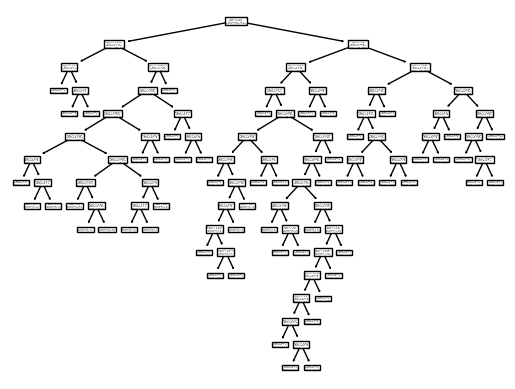

In [23]:
tree.plot_tree(Dtree1);

### test

In [24]:
X_test = test.iloc[:,:-1]
y_test = test.iloc[:,-1]

In [25]:
y_predict = Dtree1.predict(X_test)   #ตอนเทสใส่แค่x เพราะยังไม่รู้ส่าyคืออะไร

In [26]:
y_predict

array([0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1,
       0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1,
       1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,

In [27]:
 from sklearn.metrics import accuracy_score

In [28]:
accuracy_score(y_test, y_predict)

0.825136612021858

## Set parameter

### Import

In [29]:
from sklearn.tree import DecisionTreeClassifier

### Define

In [30]:
Dtree2 = DecisionTreeClassifier(random_state=0,max_depth=3)   #ต้นไม้โตแค่3ชั้น   เรากำหนดเลขเองได้

### Train

In [31]:
Dtree2.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=3, random_state=0)

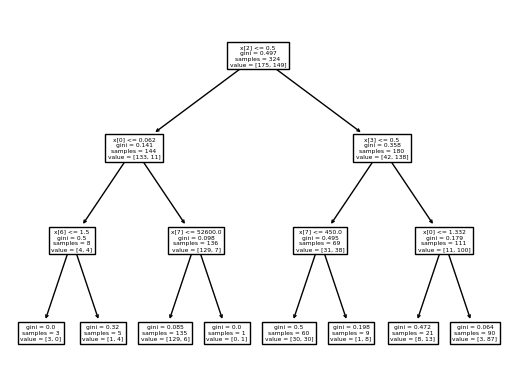

In [32]:
tree.plot_tree(Dtree2);

### Test

In [33]:
y_predict2 = Dtree2.predict(X_test)

In [34]:
accuracy_score(y_test, y_predict2)

0.8633879781420765

# HW3

ให้แต่ละกลุ่ม สร้างต้นไม้ของตัวเอง โดยปรับเปลี่ยน parameters ให้ และ มาอธิบาย parameters  ของตัวเองว่ามันคืออะไร

แถว 4 min_impurity_decrease

---- เสร็จแล้ว อยู่อีกไฟล์หนึ่ง -----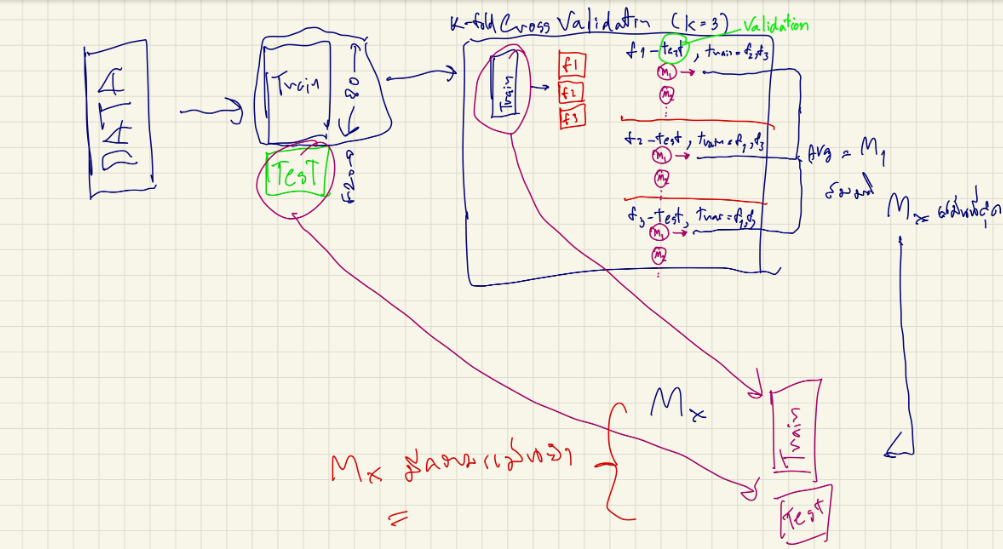

# 14/02/2024

# Training Framework


## model selection
เลือกโมเดลที่ดีที่สุดโดยเลือกจากต้นไม้ที่มี parameters: depth, criterion และ Naïve Bayes และรายงานผลการคาดการณ์สำหรับนำไปทำนายในอนาคต

In [36]:
credit

,a3,a8,a9,a10,a11,a12,a13,a15,a16
0,0.000,1.25,1,1,1,0,1,0,1
1,4.460,3.04,1,1,6,0,1,560,1
2,0.500,1.50,1,0,0,0,1,824,1
3,1.540,3.75,1,1,5,1,1,3,1
4,5.625,1.71,1,0,0,0,3,0,1
...,...,...,...,...,...,...,...,...,...
685,10.085,1.25,0,0,0,0,1,0,0
686,0.750,2.00,0,1,2,1,1,394,0
687,13.500,2.00,0,1,1,1,1,1,0
688,0.205,0.04,0,0,0,0,1,750,0


In [37]:
from sklearn.model_selection import train_test_split

In [38]:
X_credit = credit.iloc[:,:-1]
y_credit = credit.iloc[:,-1]

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X_credit, y_credit, test_size=0.2, random_state=6)

### split data into 3 folds

In [40]:
from sklearn.model_selection import KFold

In [41]:
kf = KFold(n_splits=3, shuffle=True, random_state=6)

In [42]:
for i, (train_index, test_index) in enumerate(kf.split(X_train)):
    print(f"Fold {i}:")
    print(f"  Train: index={train_index}")
    print(f"  Test:  index={test_index}")

Fold 0:
  Train: index=[  1   3   5   6   7   9  14  15  18  19  20  21  23  24  25  26  27  29
  31  33  34  35  36  37  38  39  40  41  42  45  47  49  50  51  52  54
  55  57  58  60  62  63  64  67  68  70  73  74  75  76  77  78  81  82
  83  84  86  87  88  89  91  92  94  96  97  98  99 100 101 102 103 104
 105 107 108 110 111 113 117 119 120 121 123 124 125 126 127 129 130 133
 139 142 144 145 147 148 149 150 151 152 153 154 155 157 159 160 161 165
 167 168 170 171 172 173 174 175 176 177 180 181 182 183 184 185 186 187
 190 191 192 193 194 196 197 198 199 200 201 202 204 206 207 208 209 210
 212 213 214 216 218 219 220 225 226 227 228 229 233 234 236 237 238 242
 246 248 250 251 252 254 256 257 258 261 262 263 264 265 266 267 268 270
 271 272 274 276 277 278 279 280 281 284 285 287 288 289 290 291 293 294
 295 297 301 302 303 304 305 306 313 315 316 317 318 319 320 322 323 324
 326 327 328 329 330 333 335 336 338 340 341 342 344 346 347 350 351 352
 355 356 357 358 361 362 364

In [43]:
from sklearn.naive_bayes import GaussianNB

### train 4 decision tree models and 1 Naïve Bayes

In [44]:
results = []
for i, (train_index, test_index) in enumerate(kf.split(X_train)):
    result_f = {}
    #DT depth 3, cri gini
    Dtree1 = DecisionTreeClassifier(random_state=6,max_depth=3,criterion='gini') #define
    Dtree1.fit(np.array(X_train)[train_index],np.array(y_train)[train_index])   #train
    prediction1 = Dtree1.predict(np.array(X_train)[test_index]) #predict
    acc1 = accuracy_score(np.array(y_train)[test_index], prediction1) #evaluate
    result_f['dt1'] = acc1

    #DT depth 5, cri gini
    Dtree2 = DecisionTreeClassifier(random_state=6,max_depth=5,criterion='gini')
    Dtree2.fit(np.array(X_train)[train_index],np.array(y_train)[train_index])   #train
    prediction2 = Dtree2.predict(np.array(X_train)[test_index]) #predict
    acc2 = accuracy_score(np.array(y_train)[test_index], prediction2) #evaluate
    result_f['dt2'] = acc2

    #DT depth 3, cri gain
    Dtree3 = DecisionTreeClassifier(random_state=6,max_depth=3,criterion='entropy')
    Dtree3.fit(np.array(X_train)[train_index],np.array(y_train)[train_index])   #train
    prediction3 = Dtree3.predict(np.array(X_train)[test_index]) #predict
    acc3 = accuracy_score(np.array(y_train)[test_index], prediction3) #evaluate
    result_f['dt3'] = acc3

    #DT depth 5, cri gain
    Dtree4 = DecisionTreeClassifier(random_state=6,max_depth=5,criterion='entropy')
    Dtree4.fit(np.array(X_train)[train_index],np.array(y_train)[train_index])   #train
    prediction4 = Dtree4.predict(np.array(X_train)[test_index]) #predict
    acc4 = accuracy_score(np.array(y_train)[test_index], prediction4) #evaluate
    result_f['dt4'] = acc4

    #Naïve Bayes
    gnb = GaussianNB()
    gnb.fit(np.array(X_train)[train_index],np.array(y_train)[train_index])   #train
    predictionN = gnb.predict(np.array(X_train)[test_index]) #predict
    accN = accuracy_score(np.array(y_train)[test_index], predictionN) #evaluate
    result_f['NB'] = accN

    results.append(result_f)

In [45]:
results

[{'dt1': 0.8478260869565217,
  'dt2': 0.8260869565217391,
  'dt3': 0.8478260869565217,
  'dt4': 0.8532608695652174,
  'NB': 0.8152173913043478},
 {'dt1': 0.8532608695652174,
  'dt2': 0.8260869565217391,
  'dt3': 0.8641304347826086,
  'dt4': 0.8097826086956522,
  'NB': 0.7934782608695652},
 {'dt1': 0.8152173913043478,
  'dt2': 0.8315217391304348,
  'dt3': 0.8206521739130435,
  'dt4': 0.8478260869565217,
  'NB': 0.7445652173913043}]

### find the best model from 3-fold cross validation

In [46]:
print(f"averaged acc DT1 = {(results[0]['dt1']+results[1]['dt1']+results[2]['dt1'])/3}")
print(f"averaged acc DT2 = {(results[0]['dt2']+results[1]['dt2']+results[2]['dt2'])/3}")
print(f"averaged acc DT3 = {(results[0]['dt3']+results[1]['dt3']+results[2]['dt3'])/3}")
print(f"averaged acc DT4 = {(results[0]['dt4']+results[1]['dt4']+results[2]['dt4'])/3}")
print(f"averaged acc NB = {(results[0]['NB']+results[1]['NB']+results[2]['NB'])/3}")

averaged acc DT1 = 0.8387681159420289
averaged acc DT2 = 0.8278985507246377
averaged acc DT3 = 0.8442028985507246
averaged acc DT4 = 0.8369565217391305
averaged acc NB = 0.7844202898550724


### evaluate on test

In [47]:
gnb = GaussianNB() #define
gnb.fit(np.array(X_train),np.array(y_train))   #train
prediction_test = gnb.predict(np.array(X_test)) #predict
accTest = accuracy_score(np.array(y_test), prediction_test) #evaluate

print(f'model Naïve Bayes จะมี Accuracy เมื่อไปใช้งานจริงประมาณ {accTest}')

model Naïve Bayes จะมี Accuracy เมื่อไปใช้งานจริงประมาณ 0.7463768115942029
